In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [46]:
source('0_parameters.sh')


In [23]:
p_beta <- function(df){
    df %>% ggplot(aes(x = remove_topk, y = estimate)) +
    geom_errorbar(aes(ymin = estimate - SE, ymax = estimate + SE), alpha=.5) +
    geom_point() + theme_bw(base_size = 20) + labs(
        x = '# of removed lead associations',
        y = 'BETA [SE] estimate of scale(PRS)'
    )
}

p_pval <- function(df){
    df %>% ggplot(aes(x = remove_topk, y = -log10(P))) +
    geom_point() + theme_bw(base_size = 20) + labs(
        x = '# of removed lead associations',
        y = '-log10(p) of PRS-PheWAS association'
    )

}

In [3]:
f <- file.path(data_scratch_d, 'UKB_PRS_PheWAS/HGIrel5.PRS_PheWAS.remove_topk.tsv.gz')


In [4]:
f %>% fread(colClasses = c('GBE_ID'='character')) %>%
rename('HGI_case_control'='#HGI_case_control') -> df


In [7]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5,
    remove_topk==0
) %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(P) %>%
head()

remove_topk,GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,Biomarkers,INI10030610,Alkaline phosphatase,-0.005770931,0.0004745987,-12.159600,5.190101e-34
0,Blood_assays,INI30190,Monocyte %,-0.050301629,0.0046175429,-10.893592,1.250235e-27
0,Blood_assays,INI30610,Alkaline phosphatase,-0.478839976,0.0458122544,-10.452225,1.444830e-25
0,Blood_assays,INI30130,Monocyte count,-0.003785308,0.0003801780,-9.956674,2.376329e-23
0,Biomarkers,INI10030650,Aspartate aminotransferase,-0.002244956,0.0004678284,-4.798675,1.597911e-06
0,Health_and_medical_history,BIN_FC1006149,Mouth ulcers,-0.025612879,0.0056343077,-4.545879,5.470655e-06


In [17]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5,
    GBE_ID == 'INI10030610'
) -> plot_df


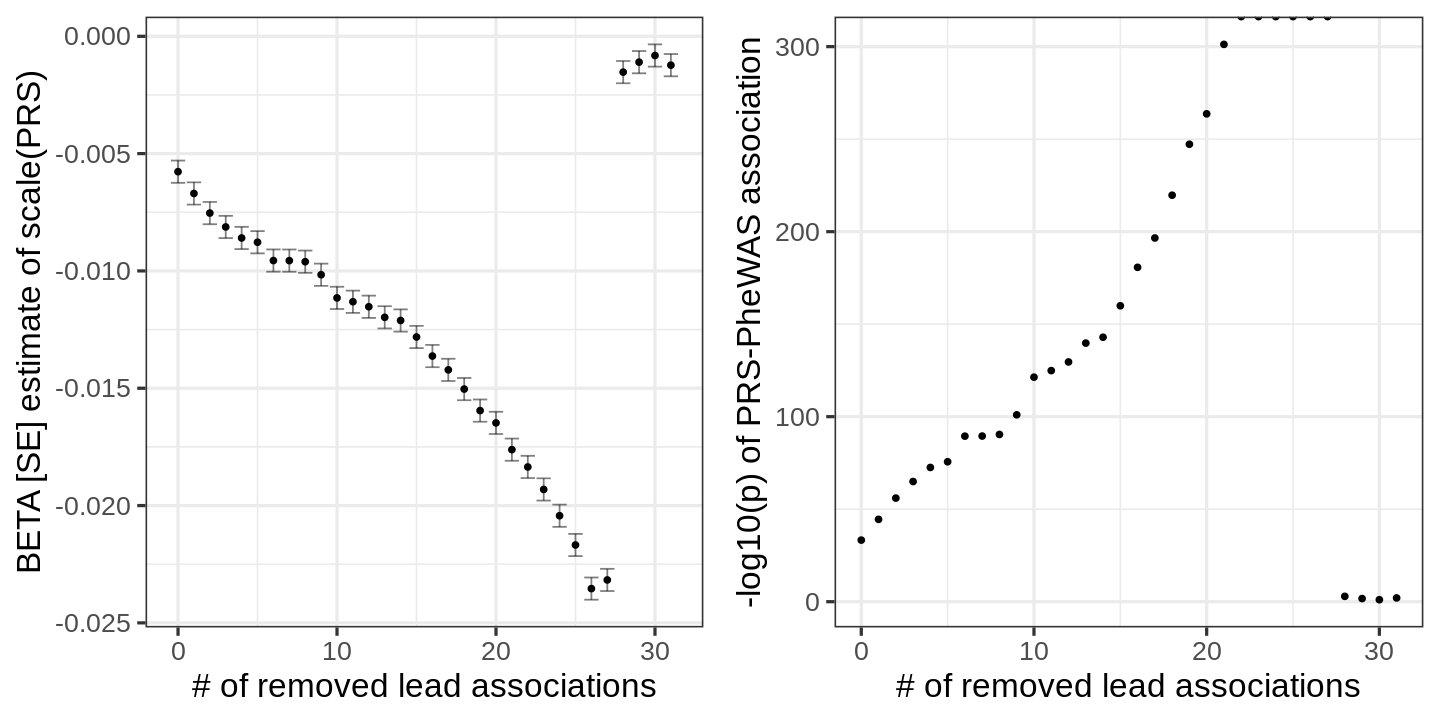

In [25]:
options(repr.plot.width=12, repr.plot.height=6)
gridExtra::grid.arrange(plot_df %>% p_beta(), plot_df %>% p_pval(), ncol=2)


In [27]:
plot_df %>%
select(-HGI_case_control, -HGI_suffix, -clump_p1) %>%
arrange(remove_topk)


remove_topk,GBE_category,GBE_ID,GBE_short_name,estimate,SE,z_or_t_value,P
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,Biomarkers,INI10030610,Alkaline phosphatase,-0.0057709308,0.0004745987,-12.159600,5.190101e-34
1,Biomarkers,INI10030610,Alkaline phosphatase,-0.0066985826,0.0004745909,-14.114435,3.193608e-45
2,Biomarkers,INI10030610,Alkaline phosphatase,-0.0075343792,0.0004746173,-15.874642,9.983430e-57
3,Biomarkers,INI10030610,Alkaline phosphatase,-0.0081256346,0.0004745993,-17.121043,1.106575e-65
4,Biomarkers,INI10030610,Alkaline phosphatase,-0.0085956941,0.0004746002,-18.111443,2.817845e-73
5,Biomarkers,INI10030610,Alkaline phosphatase,-0.0087772116,0.0004744812,-18.498544,2.326291e-76
6,Biomarkers,INI10030610,Alkaline phosphatase,-0.0095578875,0.0004744441,-20.145444,3.358908e-90
7,Biomarkers,INI10030610,Alkaline phosphatase,-0.0095611611,0.0004744654,-20.151440,2.976258e-90
8,Biomarkers,INI10030610,Alkaline phosphatase,-0.0096075477,0.0004744549,-20.249655,4.083547e-91


In [28]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-4,
    GBE_ID == 'INI10030610'
) -> plot_df


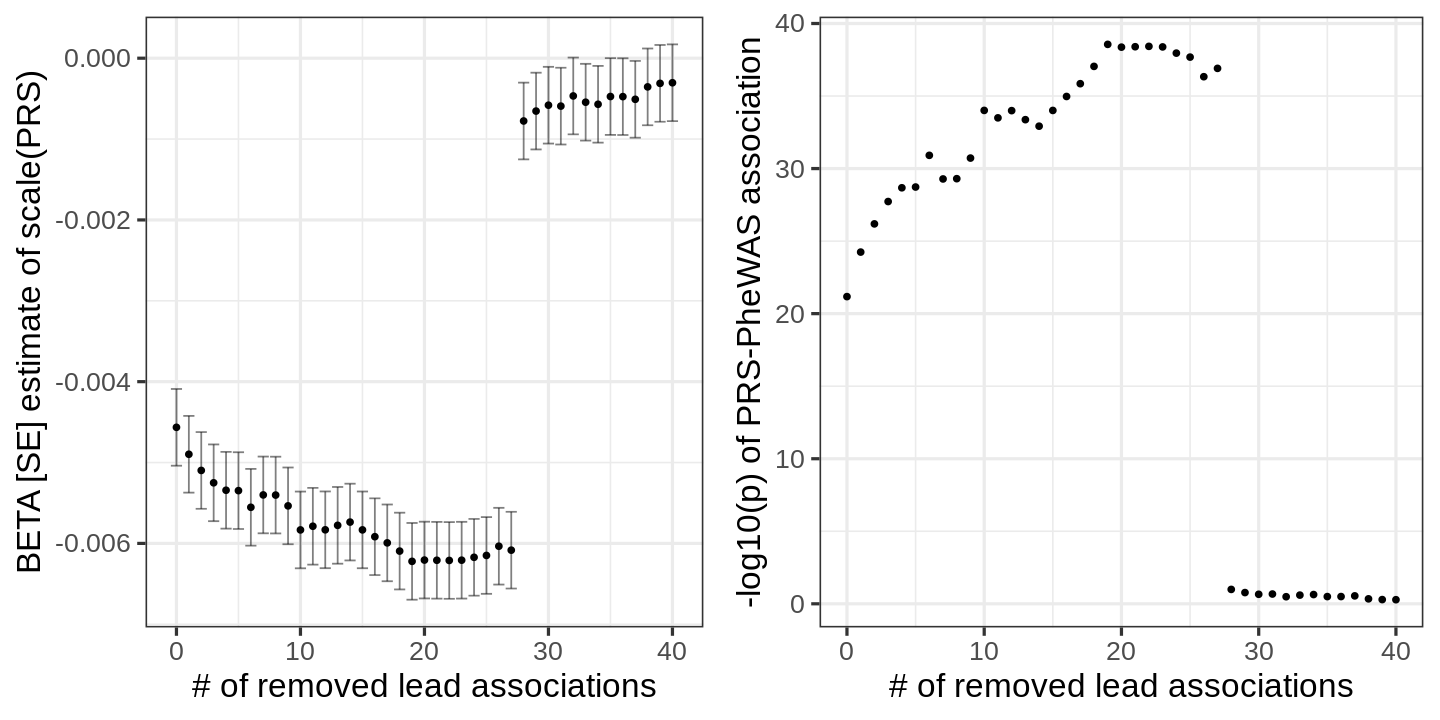

In [29]:
options(repr.plot.width=12, repr.plot.height=6)
gridExtra::grid.arrange(plot_df %>% p_beta(), plot_df %>% p_pval(), ncol=2)


In [31]:
df %>%
filter(
    HGI_case_control == 'B2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-3,
    GBE_ID == 'INI30190'
) -> plot_df


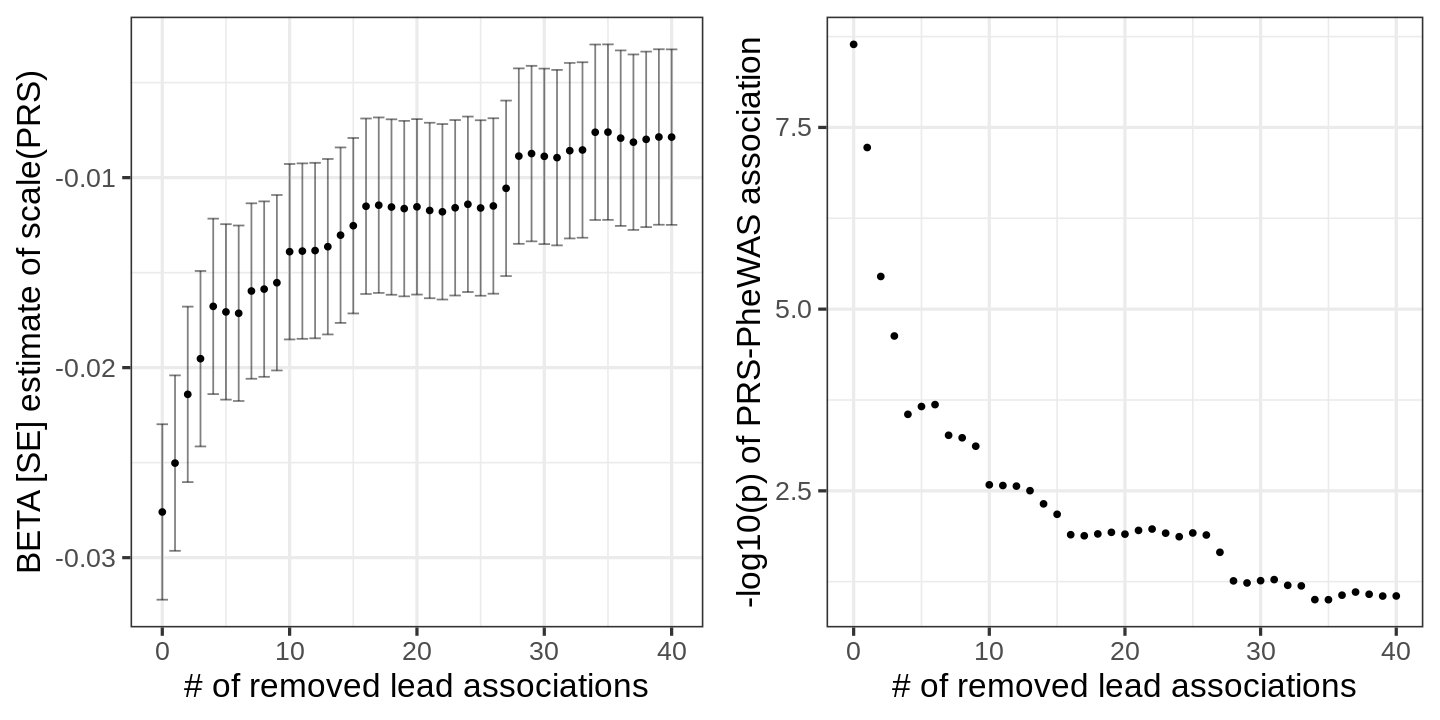

In [32]:
options(repr.plot.width=12, repr.plot.height=6)
gridExtra::grid.arrange(plot_df %>% p_beta(), plot_df %>% p_pval(), ncol=2)


In [35]:
df %>%
filter(
    HGI_case_control == 'A2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5,
    GBE_ID == 'INI30190'
) -> plot_df


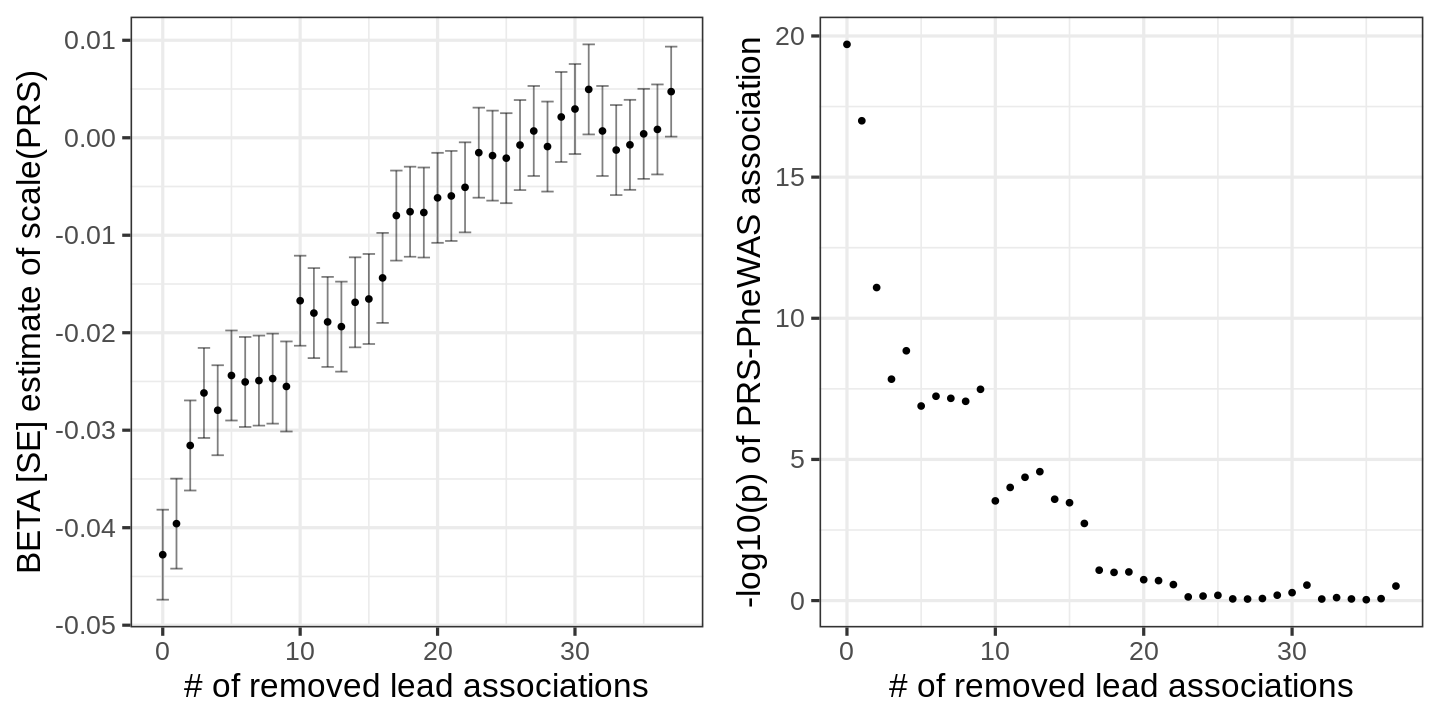

In [36]:
options(repr.plot.width=12, repr.plot.height=6)
gridExtra::grid.arrange(plot_df %>% p_beta(), plot_df %>% p_pval(), ncol=2)


In [37]:
df %>%
filter(
    HGI_case_control == 'B1', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5,
    GBE_ID == 'INI30190'
) -> plot_df


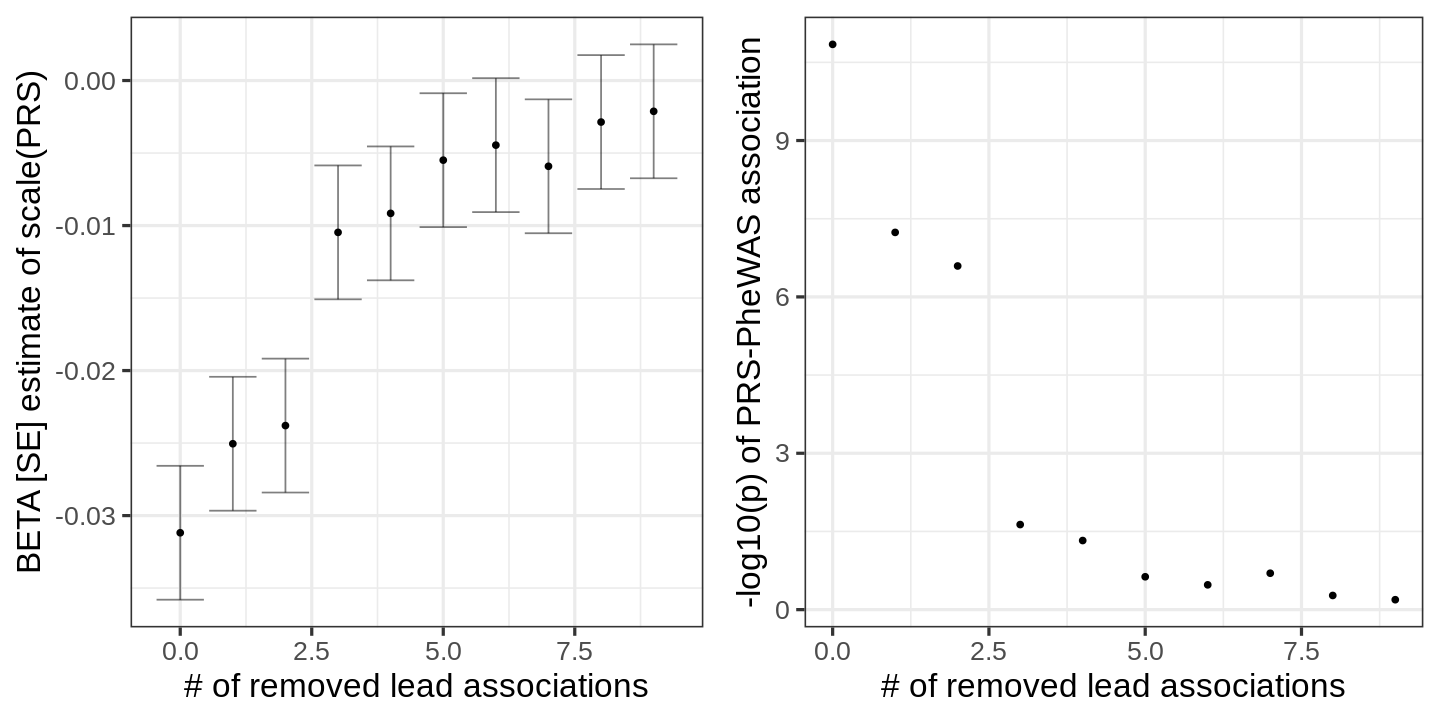

In [38]:
options(repr.plot.width=12, repr.plot.height=6)
gridExtra::grid.arrange(plot_df %>% p_beta(), plot_df %>% p_pval(), ncol=2)


In [39]:
df %>%
filter(
    HGI_case_control == 'C2', 
    HGI_suffix == 'eur_leave_ukbb_23andme',
    clump_p1 == 1e-5,
    GBE_ID == 'INI30190'
) -> plot_df


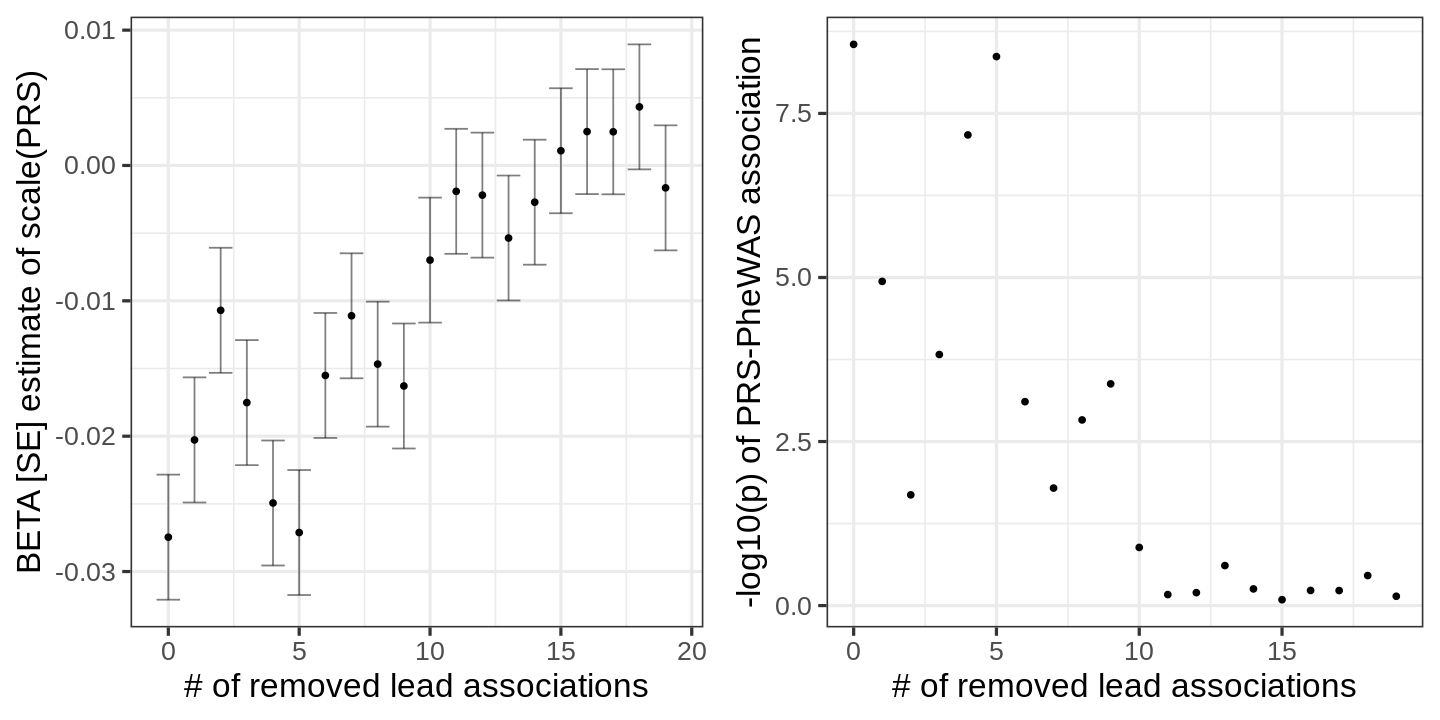

In [40]:
options(repr.plot.width=12, repr.plot.height=6)
gridExtra::grid.arrange(plot_df %>% p_beta(), plot_df %>% p_pval(), ncol=2)


## save plots

In [41]:
HGI_case_controls <- c('B2', 'C2', 'B1', 'A2')
HGI_suffices <- c(
    'eur_leave_ukbb_23andme'
)
clump_p1s <- c(1e-5, 1e-4, 1e-3)


In [44]:
ukb_phe_info %>% fread(select=c('GBE_ID', 'GBE_short_name')) -> ukb_phe_info_df
setNames(ukb_phe_info_df$GBE_short_name, ukb_phe_info_df$GBE_ID) -> ukb_phe_info_named_l


In [47]:
for(clumpp in clump_p1s){
for(HGI_cc in HGI_case_controls){
for(HGI_sx in HGI_suffices){
    clumpp_str <- str_replace(sprintf('%.0e', clumpp), '0', '')
    
    out_f <- file.path(
        repo_fig_d, 'remove_topk', sprintf(
            'HGIrel5_%s_%s.clump%s.remove_topk.png',
            HGI_cc, HGI_sx, clumpp_str
        )
    )
    
    if(!dir.exists(dirname(out_f))) dir.create(dirname(out_f))

    df %>%
    filter(
        HGI_case_control == HGI_cc, 
        HGI_suffix == HGI_sx,
        clump_p1 == clumpp
    ) -> dff
    
    dff %>% filter(remove_topk==0) %>% arrange(P) %>% pull(GBE_ID) %>% head(1) -> pheno
    
    dff %>% filter(GBE_ID == pheno) -> plot_df

    tryCatch({

        gridExtra::arrangeGrob(
            plot_df %>% p_beta(), plot_df %>% p_pval(),
            ncol=2,
            top=grid::textGrob(sprintf(
                "Removal of the top-k lead SNPs in HGI PRS (%s, %s, clump p1: %s)\n%s (%s)",
                HGI_cc, HGI_sx, clumpp_str, ukb_phe_info_named_l[[pheno]], pheno
            ),gp=grid::gpar(fontsize=20))
        ) -> g
        
        ggsave(file=out_f, g, width=16, height=8)
        ggsave(file=str_replace(out_f, '.png$', '.pdf'), g, width=16, height=8)        
        
    }, error=function(e){})
    
}}}
